# Image Processing Module 6: The Power of Thresholds pt. 2

### Purpose: To introduce more advanced Thresholding techniques and binarization

Created by: Hawley Helmbrecht

Creation Date: 08/13/2020

Last Update: 

*Step 1: Import Necessary Packages*

By now you should be pretty familiar with a few of our imports. They are great packages that are used pretty universally within scientific data science! Be proud of yourself for recognizing and knowing these packages. You are getting steps closer to being a full fledged data scientist!

In [4]:
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

*Step 2: User inputs*

In [5]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Reading in the Image*

I hope that you are noticing there is a pattern to these lessons (They all start the same way). Patterns and habits are a great way to learn and continue to integrate good and efficient coding practices.  As we go on, we will continue to use better practices (and one day even move AWAY from the Jupyter Notebook)

In [7]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

Even though we already know what this image looks like from our previous module. It is good practice to always view your images to make sure that what you expect to happen is what the computer is actually encountering.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


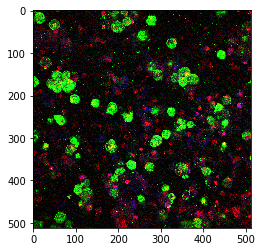

In [8]:
plt.imshow(cell_im)

*Step 5: Splitting our Channels for Thresholding*

Since we can threshold our three channel separately we will choose to do so for more effective thresholding.  The color channels are generated with different lasers and at different times within the same image processing session on a Nikon confocal microscope. So separate channel thresholding is a valid methodology!

In [9]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 6: A specific Import*

I am included this import here for teaching emphasis. Typically I would import it during Step 1.

This import will import all the functions for scikit images filters. Within these functions is a list of thresholds!  You can see the whole list at the following link: https://scikit-image.org/docs/stable/api/skimage.filters.html

In [11]:
import skimage.filters

*Types of Thresholds*

Sezgin et al 2004 split thresholds in six main types:

1. Histogram Shape
2. Clustering
3. Entropy
4. Object Attribute
5. Spatial
6. Local

Thresholds are just mathematical equations and applications that look at the pixels of images as signals with patterns and features that can be used to separate objects from the background or each other.

*Step 6: Scikit Image Thresholding Methods*

The threshoding methods available from Scikit Image are Histogram Based and Locally Based. So we are going to explore these two in our lesson today.

From your activity you should have just used the try_all_thresholds method from Sci-kit Image to try a bunch of thresholds at once (included here for reference)

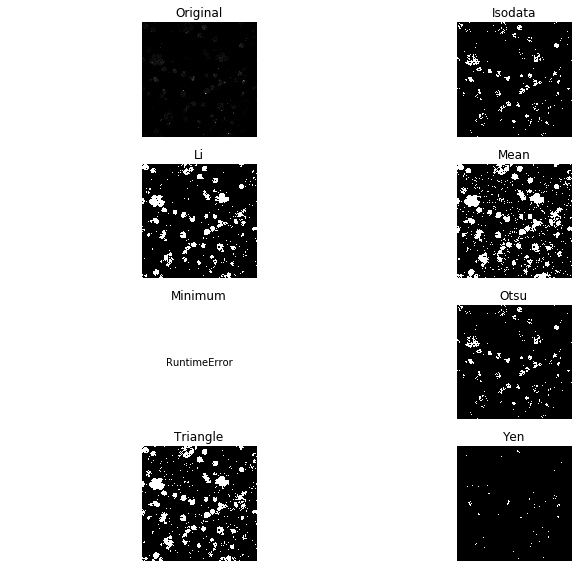

In [15]:
fig, ax = skimage.filters.try_all_threshold(green_cell_im, figsize=(10, 8), verbose=False)
plt.show()

Anyone want to make an educated guess as to why the Minimum thresholding method doesn't work on this image? 

*Step 7: Histogram Based Method*

In [1]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu

NameError: name 'skimage' is not defined

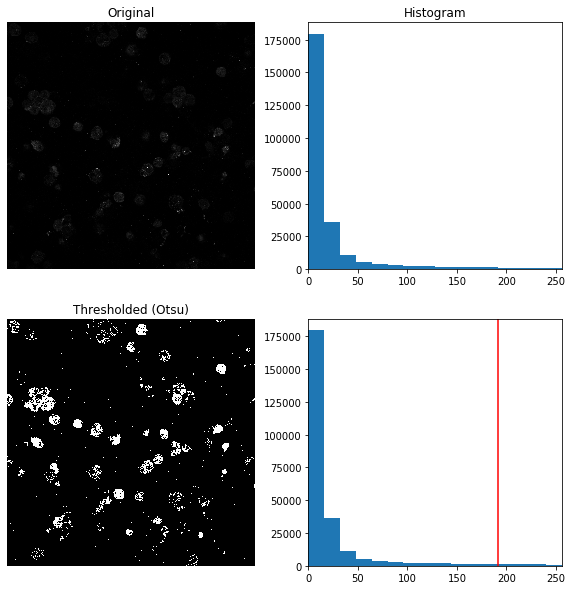

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0, 256)) 

ax[1, 0].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

Does anyone want to make a guess on why there is a large peak so close to 0 for our images?

In [29]:
thresh_otsu

191

Let's look at how our original image looks to our computer in comparison to the "binarized otsu image"

In [30]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

In [31]:
binary_otsu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

So that's weird??  The original image is an array of numbers, and our thresholded image is a bunch of True's and Falses.

The Binary Image is in Boolean form!  It is a binarization of our image meaning there are only 2 (bi) values that any pixel can hold now.  Which is False for black and True for white!

If you look at the Histogram image above with the red line, anything below that line has been changed by the function to False and anything above has been changed to the True value!

Can you think of why this method is useful?

*Step 8: Local Threshold*

As in the activity, the otsu threshold here provides one number by which to threshold the entire image. However, that "global" versioning of thresholding doesn't worry ideally for all images. In situations where you need a threshold that varies across the image a local threshold works better.

In [34]:
thresh_local = skimage.filters.threshold_local(green_cell_im)
binary_local = green_cell_im > thresh_local

TypeError: threshold_local() missing 1 required positional argument: 'block_size'

The above code returns an error!

In [36]:
block_size = 35

thresh_local = skimage.filters.threshold_local(green_cell_im, block_size)
binary_local = green_cell_im > thresh_local

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

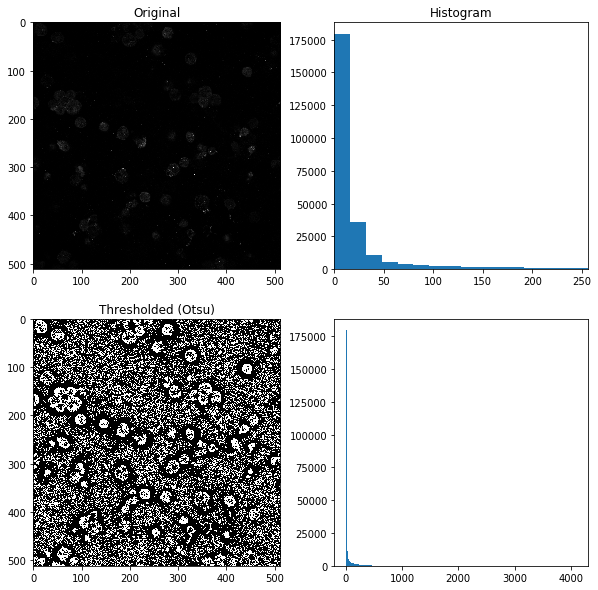

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0,1].set_xlim((0, 256)) 

ax[1, 0].imshow(binary_local, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_local, color='r')
ax[1,1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

Oooh there was an error in the local threshold!  How fun! 

Take a second to read the error and try to figure out what caused the error based on the type of threshold we are using?

That is right!! The local method has many not a sigle threshold value!

In [42]:
thresh_local

array([[82.37382994, 82.5434584 , 82.86984328, ...,  9.97327634,
         9.91357886,  9.88374448],
       [82.69023653, 82.9065453 , 83.32375547, ..., 10.00578195,
         9.94943066,  9.92114785],
       [83.31453188, 83.62059692, 84.21241792, ..., 10.06295199,
        10.01295406,  9.9876192 ],
       ...,
       [54.22196067, 54.35545151, 54.61881284, ...,  6.97668359,
         7.02444879,  7.04848873],
       [54.24131585, 54.36993684, 54.62307549, ...,  6.8850232 ,
         6.93254753,  6.95648741],
       [54.25394635, 54.37992047, 54.62751819, ...,  6.83696329,
         6.88437352,  6.90826815]])

Since it thresholds the image as it goes and detects objects!

In [43]:
binary_local

array([[False,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True, False,  True],
       [False,  True,  True, ...,  True, False,  True],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

Just compary the binary output from the otsu vs local method. Although they both started from the same image they are clearly showing different values and images now!

That is the power of thresholds! 

I hope from the end of this two part lesson you have realized how important a thresholding decision is to image processing :) 

__Recall Activity:__

Threshold one of the other color channels based on any of the methods used or listed above!  Which one gives you the best threshold?

__Next Week:__

Data Science: Documentation and Lab notebooks

Image Processing: Segmenting, Labeling, and Basic Cell Morphology